# **Curso** : Python para Data Science

**Sesión 03.2**
Análisis de Asociaciones

**Profesor**:
* Ing. Cristhian Castro Chávez
* castro.ca@pucp.pe


## Data Mining for Grocery Stores
https://www.kaggle.com/roshansharma/market-basket-optimization?select=Market_Basket_Optimisation.csv


En este notebook , haremos uso del algoritmo Apriori para realizar análisis de las reglas de asociación de los comportamientos de compra de los clientes. Podemos predecir (con alta probabilidad) lo que el cliente va a comprar a continuación al observar los productos que está comprando.

Tomado y adaptado de:
https://www.kaggle.com/evrenermis/association-rule-based-learning-explained

También revisar:
https://goldinlocks.github.io/Market-Basket-Analysis-in-Python/

In [1]:
#Cargamos las librerías necesarias
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Data_analytics/main/Sesion_8/Market_Basket_Optimisation.csv', header=None)
data.shape

(7501, 20)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
#Examinamos las primeras 10 instancias del dataset
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# En esta ocasión cada fila correspode a una transacción (una compra)
data.loc[3]

0      turkey
1     avocado
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
Name: 3, dtype: object

In [6]:
# En esta ocasión cada fila correspode a una transacción (una compra)
data.loc[7]

0            soup
1     light cream
2         shallot
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
Name: 7, dtype: object

# Visualización de los datos

In [7]:
data.shape

(7501, 20)

In [8]:
# Filas
data.shape[0]

7501

In [9]:
# Columnas
data.shape[1]

20

In [10]:
# 1. Almacenamos los items de cada transacción dentro de un array Numpy
total_items = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        total_items.append(data.values[i,j])

total_items = np.array(total_items) # Convertir en un arreglo de Numpy

In [11]:
total_items.shape

(150020,)

In [12]:
total_items

array(['shrimp', 'almonds', 'avocado', ..., 'nan', 'nan', 'nan'],
      dtype='<U32')

In [13]:
# 2. Transformamos en un dataframe de Pandas
df = pd.DataFrame(total_items, columns=["items"])
df["incident_count"] = 1 # Colocamos 1 a cada ítem para luego hacer más fácil la cuenta (suma)

In [14]:
df

,items,incident_count
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
150015,nan,1
150016,nan,1
150017,nan,1
150018,nan,1


In [15]:
# Verificamos la cantidad de elemenos distintos. Es decir la cantida de elementos únicos distintos en la tienda
df['items'].nunique()

121

In [16]:
# 3. Eliminamos los NaN
# indexNames = df[df['items'] == "nan"].index
# df.drop(indexNames, inplace=True)

In [17]:
# 3. Eliminamos los NaN
nan_indices = df[df['items'] == "nan"].index
nan_indices


Index([    23,     24,     25,     26,     27,     28,     29,     30,     31,
           32,
       ...
       150010, 150011, 150012, 150013, 150014, 150015, 150016, 150017, 150018,
       150019],
      dtype='int64', length=120657)

In [18]:
df.loc[23]

items             nan
incident_count      1
Name: 23, dtype: object

In [19]:
df.drop(nan_indices, inplace=True)

In [20]:
# Verificamos la cantidad de elemenos distintos. Es decir la cantida de elementos únicos distintos en la tienda
df['items'].nunique()

120

In [21]:
df

,items,incident_count
0,shrimp,1
1,almonds,1
2,avocado,1
3,vegetables mix,1
4,green grapes,1
...,...,...
149981,green tea,1
150000,eggs,1
150001,frozen smoothie,1
150002,yogurt cake,1


In [22]:
# 4. Realizamos un groupby para contar las veces que un item aparece en tota. Y realizar finalmente una visualización
# .sum(), por defecto sumará todas las columnas numéricas que no sean la columna "items"
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

In [23]:
# 5. Visualizamos los 20 productos que se compran más frecuentemente
df_table.head(20).style.background_gradient(cmap='Blues')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [24]:
df_table.head(60).style.background_gradient(cmap='Blues')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


In [25]:
df_table["all"] = "all" # Para tener el mismo origen de los datos en table heatmap
df_table.head()

,items,incident_count,all
0,mineral water,1788,all
1,eggs,1348,all
2,spaghetti,1306,all
3,french fries,1282,all
4,chocolate,1230,all


In [26]:
# Otra forma de visualizar (table heatmap)
# fig = px.treemap(df_table.head(60), path=['all', "items"],
#                  values='incident_count',
#                  color=df_table["incident_count"].head(60),
#                  hover_data=['items'],
#                  color_continuous_scale='Blues',
#                   )
# fig.show()

In [27]:
# Otra forma de visualizar (table heatmap usando plotly)
fig = px.treemap(df_table.head(60),  
                 path                   = ['all', "items"],
                 values                 = 'incident_count',
                 color                  = 'incident_count',
                 hover_data             = ['items'],
                 color_continuous_scale = 'blues',  # Se puede usar "Blues", "blues" o "viridis"
                )
fig.show()

In [28]:
fig.write_html('3 DataCreada/mapa.html')

In [29]:
# import sys
# sys.exit("Detener script")

# Pre-Procesamiento de Datos

Para poder implementar un algoritmo a priori y obtener conjuntos de elementos más frecuentes, tenemos que transformar nuestro conjunto de datos en una matriz 1 - 0 donde las filas son transacciones y las columnas son los productos. En esa matriz, se debe codificar "1" si el producto se compró en esa transacción y "0" se debe codificar si el producto no se compró en esa transacción. Este preprocesamiento es necesario para utilizar el algoritmo.

In [30]:
data.shape

(7501, 20)

In [31]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Los for de una sola linea o "list comprehensions" solo se ejecuta cuando estan dentro de una lista
[ str(data.values[0,j]) for j in range(data.shape[1]) ]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [33]:
# Transformar cada transacción en una lista separada y almacenarla dentro de un array numpy
transaction = []
for i in range(data.shape[0]):
    transaction.append( [str(data.values[i,j]) for j in range(data.shape[1])] )

transaction = np.array(transaction)

In [34]:
transaction.shape

(7501, 20)

In [35]:
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [36]:
# Primera transacción
transaction[0]

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], dtype='<U20')

In [37]:
# Segunda transacción
transaction[1]

array(['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan'], dtype='<U20')

In [38]:
# import sys
# sys.exit("Detener script")

In [39]:
# Transformamos a un wide dataset con 120 columnas, cada columna representa un elemento del inventario, y contiene True si el elemento esta presente en la transación
"""
La porción de código proporcionada realiza la transformación de un conjunto de transacciones en un formato adecuado para el análisis de asociaciones. Aquí está lo que hace paso a paso:
1. te = TransactionEncoder(): Se crea un objeto TransactionEncoder que se utilizará para convertir las transacciones en un formato adecuado para el análisis de asociaciones.
2. te_ary = te.fit(transaction).transform(transaction): Se ajusta el TransactionEncoder a las transacciones existentes y se transforman esas transacciones en un formato binario donde cada columna representa un elemento del inventario y contiene un valor de True si el elemento está presente en la transacción o False si no lo está.
3. dataset = pd.DataFrame(te_ary, columns=te.columns_): Se crea un DataFrame de Pandas a partir de la matriz transformada, donde las columnas representan los elementos del inventario y las filas representan cada transacción, con valores binarios que indican la presencia o ausencia de cada elemento en la transacción.
En resumen, esta porción de código convierte las transacciones originales en un formato tabular que es más adecuado para el análisis de asociaciones, lo que facilita la identificación de patrones de compra y relaciones entre los elementos del inventario.
"""

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
dataset.shape

(7501, 121)

In [41]:
# Primera compra
dataset.iloc[0]

 asparagus           False
almonds               True
antioxydant juice     True
asparagus            False
avocado               True
                     ...  
whole wheat pasta    False
whole wheat rice     False
yams                  True
yogurt cake          False
zucchini             False
Name: 0, Length: 121, dtype: bool

In [42]:
# Esta tabla tiene almacenado los 80 productos más vendidos del total de los 120 disponibles
df_table.head(80)

,items,incident_count,all
0,mineral water,1788,all
1,eggs,1348,all
2,spaghetti,1306,all
3,french fries,1282,all
4,chocolate,1230,all
...,...,...,...
75,candy bars,73,all
76,zucchini,71,all
77,whole weat flour,70,all
78,salt,69,all


In [43]:
# Nos quedamos con una lista de los 80 productos más vendidos
first80 = df_table["items"].head(80).values

In [44]:
first80

array(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables',
       'pancakes', 'burgers', 'cake', 'cookies', 'escalope',
       'low fat yogurt', 'shrimp', 'tomatoes', 'olive oil',
       'frozen smoothie', 'turkey', 'chicken', 'whole wheat rice',
       'grated cheese', 'cooking oil', 'soup', 'herb & pepper', 'honey',
       'champagne', 'fresh bread', 'salmon', 'brownies', 'avocado',
       'hot dogs', 'cottage cheese', 'tomato juice', 'butter',
       'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'vegetables mix',
       'cereals', 'muffins', 'oil', 'french wine', 'fresh tuna',
       'strawberries', 'meatballs', 'almonds', 'parmesan cheese',
       'mushroom cream sauce', 'rice', 'protein bar', 'mint',
       'white wine', 'pasta', 'light cream', 'carrots', 'black tea',
       'tomato sauce', 'fromage blanc', 'gums', 'eggplant', 'melons

In [45]:
# import sys
# sys.exit("Detener script")

Tenemos 121 columnas en total. Comenzaremos analizando solo con los 80 elementos principales

In [46]:
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
dataset = dataset.loc[:,first80] # Extraemos solo las columnas que corresponden a los 80 top productos más vendidos*
dataset

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,yams,magazines,barbecue sauce,cider,nonfat milk,candy bars,zucchini,whole weat flour,salt,blueberries
0,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,True,False,True,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# Nuestro dataset ahora solo contiene las columnas de los 80 productos más vendidos
dataset.columns

Index(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes',
       'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp',
       'tomatoes', 'olive oil', 'frozen smoothie', 'turkey', 'chicken',
       'whole wheat rice', 'grated cheese', 'cooking oil', 'soup',
       'herb & pepper', 'honey', 'champagne', 'fresh bread', 'salmon',
       'brownies', 'avocado', 'hot dogs', 'cottage cheese', 'tomato juice',
       'butter', 'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'vegetables mix',
       'cereals', 'muffins', 'oil', 'french wine', 'fresh tuna',
       'strawberries', 'meatballs', 'almonds', 'parmesan cheese',
       'mushroom cream sauce', 'rice', 'protein bar', 'mint', 'white wine',
       'pasta', 'light cream', 'carrots', 'black tea', 'tomato sauce',
       'fromage blanc', 'gums', 'eggplant', 'melons', 'ext

In [49]:
# Convertimos el dataset en una matriz de 1 y 0
def encode_units(x):
    if x == False:
        return 0
    if x == True:
        return 1

dataset = dataset.applymap(encode_units)
dataset.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,...,yams,magazines,barbecue sauce,cider,nonfat milk,candy bars,zucchini,whole weat flour,salt,blueberries
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
dataset.shape

(7501, 80)

In [51]:
# import sys
# sys.exit("Detener script")

# Algoritmo A-Priori

Ahora si estamos listos para ejecutar el Algoritmo apriori

In [52]:
# Extramos los itemset más frecuentes y que cumplen la condición dada (support > 0.01), 0.01 significa 1%
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.238368,(mineral water)
1,0.179709,(eggs)
2,0.174110,(spaghetti)
3,0.170911,(french fries)
4,0.163845,(chocolate)
...,...,...
252,0.010932,"(chocolate, ground beef, mineral water)"
253,0.011065,"(milk, ground beef, mineral water)"
254,0.011065,"(milk, frozen vegetables, mineral water)"
255,0.010532,"(chocolate, eggs, spaghetti)"


In [53]:
# Añadimos el tamaño del itemset (elementos dentro de la compra)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
252,0.010932,"(chocolate, ground beef, mineral water)",3
253,0.011065,"(milk, ground beef, mineral water)",3
254,0.011065,"(milk, frozen vegetables, mineral water)",3
255,0.010532,"(chocolate, eggs, spaghetti)",3


In [54]:
# Cuántos elementos contiene cada compra?
frequent_itemsets['length'].value_counts().sort_index()

length
1     75
2    165
3     17
Name: count, dtype: int64

In [55]:
# Verificamos los itemset de tamaño 2. Los ordenamos por support, de mayor a menor
frequent_itemsets[frequent_itemsets['length']==2].sort_values('support', ascending=False).head(20)

,support,itemsets,length
76,0.059725,"(mineral water, spaghetti)",2
78,0.052660,"(chocolate, mineral water)",2
75,0.050927,"(eggs, mineral water)",2
80,0.047994,"(milk, mineral water)",2
81,0.040928,"(ground beef, mineral water)",2
131,0.039195,"(ground beef, spaghetti)",2
128,0.039195,"(chocolate, spaghetti)",2
105,0.036528,"(eggs, spaghetti)",2
106,0.036395,"(french fries, eggs)",2
82,0.035729,"(frozen vegetables, mineral water)",2


In [56]:
# Verificamos los itemset de tamaño 3. Los ordenamos por support, de mayor a menor
frequent_itemsets[frequent_itemsets['length']==3].sort_values('support', ascending=False)

,support,itemsets,length
247,0.017064,"(ground beef, mineral water, spaghetti)",3
245,0.015865,"(chocolate, mineral water, spaghetti)",3
246,0.015731,"(milk, mineral water, spaghetti)",3
240,0.014265,"(eggs, mineral water, spaghetti)",3
251,0.013998,"(chocolate, milk, mineral water)",3
241,0.013465,"(chocolate, eggs, mineral water)",3
242,0.013065,"(milk, eggs, mineral water)",3
248,0.011998,"(frozen vegetables, mineral water, spaghetti)",3
249,0.011465,"(spaghetti, mineral water, pancakes)",3
253,0.011065,"(milk, ground beef, mineral water)",3


<Axes: >

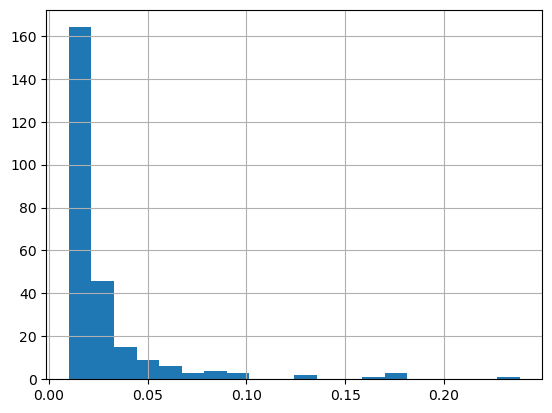

In [57]:
# Visualizamos la distribución de "support" en un histograma
frequent_itemsets['support'].hist(bins=20)

In [58]:
# Prodemos explorar rápidamente algunos itemset que cumplen con las siguientes condiciones
# Obtenemos los itemset de tamaño 2. Con un soporte mayor o igual a 3%
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.03)]

,support,itemsets,length
75,0.050927,"(eggs, mineral water)",2
76,0.059725,"(mineral water, spaghetti)",2
77,0.033729,"(french fries, mineral water)",2
78,0.052660,"(chocolate, mineral water)",2
79,0.031063,"(mineral water, green tea)",2
80,0.047994,"(milk, mineral water)",2
81,0.040928,"(ground beef, mineral water)",2
82,0.035729,"(frozen vegetables, mineral water)",2
83,0.033729,"(mineral water, pancakes)",2
105,0.036528,"(eggs, spaghetti)",2


In [59]:
# import sys
# sys.exit("Detener script")

Para empezar nuestra métrica del filtrado será el 'Lift'

In [60]:
# Ahora procedemos a crear nuestras reglas. Para eso definimos un umbral mínimo de lift (puede ser 1.2)
# Creamos reglas que tengan un lift por encima de 1.2, es decir, las reglas que se van a crear son reglas que generan un incremento en las ventas de al menos un 20%
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
2,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
3,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
...,...,...,...,...,...,...,...,...,...,...
343,"(chocolate, spaghetti)",(milk),0.039195,0.129583,0.010932,0.278912,2.152382,0.005853,1.207088,0.557239
344,"(milk, spaghetti)",(chocolate),0.035462,0.163845,0.010932,0.308271,1.881480,0.005122,1.208790,0.485728
345,(chocolate),"(milk, spaghetti)",0.163845,0.035462,0.010932,0.066721,1.881480,0.005122,1.033494,0.560307
346,(milk),"(chocolate, spaghetti)",0.129583,0.039195,0.010932,0.084362,2.152382,0.005853,1.049329,0.615106


In [61]:
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))

In [62]:
# Ordenamos nuestras reglas basado en Lift
rules.sort_values("lift",ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094,1,1
290,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,0.697788,2,1
291,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602,1,2
308,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,0.656007,2,1
309,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,0.660314,1,2
231,(tomatoes),(frozen vegetables),0.068391,0.095321,0.016131,0.235867,2.474464,0.009612,1.183930,0.639616,1,1
230,(frozen vegetables),(tomatoes),0.095321,0.068391,0.016131,0.169231,2.474464,0.009612,1.121381,0.658656,1,1
229,(shrimp),(frozen vegetables),0.071457,0.095321,0.016664,0.233209,2.446574,0.009853,1.179825,0.636767,1,1
228,(frozen vegetables),(shrimp),0.095321,0.071457,0.016664,0.174825,2.446574,0.009853,1.125268,0.653563,1,1


In [63]:
rules.shape

(348, 12)

De acuerdo con la tabla anterior, podemos decir fácilmente que la dependencia entre (hierba y pimienta) y (carne molida) es alta, ya que el puntaje de elevación (lift) es aproximadamente 2.5x del umbral y el puntaje de confianza (confidence) es (32%)

El umbral mencionado en el contexto, es el umbral de 1.2 para el puntaje de elevación (lift) para crear las reglas de asociacion, en el análisis de asociaciones, 1.2 x 2.5 = 3

In [64]:
# Ordenamos nuestras reglas basado en Confidence
rules.sort_values("confidence",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
266,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342,2,1
324,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969,2,1
318,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837,2,1
330,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555,2,1
34,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,1,1
301,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452,2,1
307,"(olive oil, spaghetti)",(mineral water),0.022930,0.238368,0.010265,0.447674,1.878079,0.004799,1.378954,0.478514,2,1
283,"(milk, spaghetti)",(mineral water),0.035462,0.238368,0.015731,0.443609,1.861024,0.007278,1.368879,0.479672,2,1
312,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656,0.467922,2,1
289,"(ground beef, spaghetti)",(mineral water),0.039195,0.238368,0.017064,0.435374,1.826477,0.007722,1.348914,0.470957,2,1


In [65]:
# import sys
# sys.exit("Detener script")|

Según la tabla anterior, se espera que los clientes que compraron (huevos, carne molida) compren (agua mineral) con una probabilidad del 50% (confianza). Los puntajes de Lift y Confianza también respaldan esa hipótesis
¡Sería mejor mantenerlos cerca para aumentar las ventas!

Dado que el producto más demandado en el conjunto de datos es el agua mineral, los resultados de la asociación están dominados principalmente por este. Por esa razón, para obtener más información, es mejor crear una tabla de confianza que excluya el agua mineral.

In [66]:
# regex=False, Este parámetro en el método str.contains indica que la búsqueda de patrones en las cadenas no se realizará como una expresión regular, es decir, se buscará una coincidencia exacta de la cadena especificada. En este caso, se está buscando la cadena exacta "mineral water" en las columnas "consequents" y "antecedents".
# ~,  Este operador se utiliza como operador de negación bit a bit. En el contexto de Pandas, se usa para invertir una serie booleana. Es decir, convierte True en False y viceversa. Aquí se utiliza para excluir las filas donde "mineral water" está presente en las columnas "consequents" o "antecedents".
# Las expresiones regulares buscar match a nivel de formatos (correos, emails, telefonos, etc)
rules[~rules["consequents"].str.contains("mineral water", regex=False) &
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence", ascending=False).head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
74,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
110,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,0.538028,1,1
88,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,0.535186,1,1
342,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,0.504495,2,1
56,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,0.499424,1,1
104,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,0.495018,1,1
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,0.732460,1,1
336,"(chocolate, eggs)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,0.466715,2,1
108,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,0.470079,1,1
98,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,0.472963,1,1


Según la tabla anterior (sin el agua mineral), podemos decir que existe una relación significativa entre la carne molida y los espaguetis, el vino tinto y los espaguetis. Los puntajes de Lift y Confianza también lo respaldan.

La carne molida está en la parte superior de la tabla tanto en la tabla que contiene Agua Mineral como la que no contiene. Por esa razón, para captar nuevas asociaciones relacionadas con la carne molida e impulsar las ventas, busquemos asociaciones donde la carne molida sea antecedente.

In [67]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
6,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369,1,1
74,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943,1,1
129,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,0.334908,1,1
175,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,0.467090,1,1
291,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,0.727602,1,2
204,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031,0.495528,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,0.772094,1,1
206,(ground beef),(pancakes),0.098254,0.095054,0.014531,0.147897,1.555925,0.005192,1.062015,0.396226,1,1
214,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066,0.601168,1,1
208,(ground beef),(burgers),0.098254,0.087188,0.011998,0.122117,1.400607,0.003432,1.039787,0.317189,1,1


In [68]:
# import sys
# sys.exit("Detener script")

Como se vio el análisis anterior, la flexibilidad del algoritmo y la biblioteca mlxtend es alta, por lo que podemos investigar fácilmente diferentes aspectos y obtener nuevas asociaciones a partir de los datos. Por esa razón, las investigaciones podrían detallarse más tomando otros productos (resto de los Top80) en el cálculo o cambiando el umbral de criterios.

Sin embargo, dado que el aprendizaje de las reglas de asociación tiene un esquema iterativo, las habilidades y actividades de comprensión e interpretación de datos son realmente importantes. En ese caso, debemos dar suficiente importancia a los pasos de visualización de datos y / o limpieza de datos (si es necesario) para asegurarnos de que estamos en el camino correcto.

In [69]:
dataset_ = dataset.drop(['mineral water', 'eggs', 'spaghetti'], axis=1)

In [70]:
dataset_

,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,...,yams,magazines,barbecue sauce,cider,nonfat milk,candy bars,zucchini,whole weat flour,salt,blueberries
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# import sys
# sys.exit("Detener script")

In [72]:
# Visualización de Reglas de Asociación
# max_len, es el numero máximo de elementos en un itemset
frequent_itemsets = apriori(dataset_, min_support=0.01, max_len=3, use_colnames=True)  

In [73]:
frequent_itemsets.shape

(160, 2)

In [74]:
frequent_itemsets

,support,itemsets
0,0.170911,(french fries)
1,0.163845,(chocolate)
2,0.132116,(green tea)
3,0.129583,(milk)
4,0.098254,(ground beef)
...,...,...
155,0.010532,"(shrimp, pancakes)"
156,0.010799,"(olive oil, pancakes)"
157,0.011465,"(burgers, cake)"
158,0.010665,"(burgers, turkey)"


In [75]:
# import sys
# sys.exit("Detener script")

In [76]:
# Creamos reglas con un soporte mayor al 0.5%
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.005)

In [77]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786,0.251529
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286
4,(milk),(french fries),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956,0.076645


In [78]:
rules.shape

(176, 10)

In [79]:
rules.dtypes

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
zhangs_metric         float64
dtype: object

In [80]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule']=rules.index

In [81]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
0,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275,chocolate,french fries,0
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169,french fries,chocolate,1
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786,0.251529,french fries,green tea,2
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286,green tea,french fries,3
4,(milk),(french fries),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956,0.076645,milk,french fries,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434,cake,burgers,171
172,(burgers),(turkey),0.087188,0.062525,0.010665,0.122324,1.956404,0.005214,1.068134,0.535552,burgers,turkey,172
173,(turkey),(burgers),0.062525,0.087188,0.010665,0.170576,1.956404,0.005214,1.100536,0.521463,turkey,burgers,173
174,(tomatoes),(shrimp),0.068391,0.071457,0.011199,0.163743,2.291481,0.006311,1.110355,0.604976,tomatoes,shrimp,174


In [82]:
# import sys
# sys.exit("Detener script")

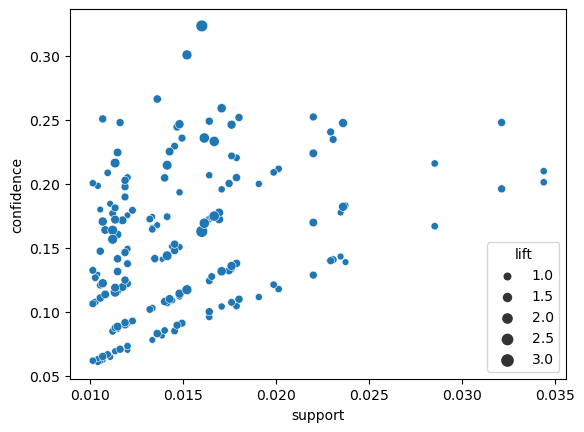

In [83]:
import seaborn as sns
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.show()

In [84]:
px.scatter(rules, x='support', y='confidence', size='lift',width=800, hover_data = ['antecedent','consequent'])

In [85]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
0,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275,chocolate,french fries,0
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169,french fries,chocolate,1
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786,0.251529,french fries,green tea,2
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286,green tea,french fries,3
4,(milk),(french fries),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956,0.076645,milk,french fries,4


In [86]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         176 non-null    object 
 1   consequents         176 non-null    object 
 2   antecedent support  176 non-null    float64
 3   consequent support  176 non-null    float64
 4   support             176 non-null    float64
 5   confidence          176 non-null    float64
 6   lift                176 non-null    float64
 7   leverage            176 non-null    float64
 8   conviction          176 non-null    float64
 9   zhangs_metric       176 non-null    float64
 10  antecedent          176 non-null    object 
 11  consequent          176 non-null    object 
 12  rule                176 non-null    int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 18.0+ KB


In [87]:
import plotly.express as px
fig = px.scatter(rules, x="support", y="confidence",size='lift',size_max=10,hover_data=['antecedent','consequent'],width=800, color='lift')
fig.show()

In [88]:
# Reglas sin considerar al agua mineral
rules_alt = rules[~rules["consequents"].str.contains("mineral water", regex=False) &
      ~rules["antecedents"].str.contains("mineral water", regex=False)]

In [89]:
rules_alt.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent,consequent,rule
0,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275,chocolate,french fries,0
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169,french fries,chocolate,1
2,(french fries),(green tea),0.170911,0.132116,0.028530,0.166927,1.263488,0.005950,1.041786,0.251529,french fries,green tea,2
3,(green tea),(french fries),0.132116,0.170911,0.028530,0.215943,1.263488,0.005950,1.057436,0.240286,green tea,french fries,3
4,(milk),(french fries),0.129583,0.170911,0.023730,0.183128,1.071482,0.001583,1.014956,0.076645,milk,french fries,4


In [90]:
rules_alt.isna().sum()

antecedents           0
consequents           0
antecedent support    0
consequent support    0
support               0
confidence            0
lift                  0
leverage              0
conviction            0
zhangs_metric         0
antecedent            0
consequent            0
rule                  0
dtype: int64

In [91]:
fig = px.scatter(rules_alt, x="support", y="confidence",size='lift',size_max=15,hover_data=['antecedent','consequent'],color='zhangs_metric', width=900)
fig.show()

Otra forma de visualizar las relaciones es mediante Parallel_coordinates
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html


In [92]:
import sys
sys.exit("Detener script")

SystemExit: Detener script

In [ ]:
coords = rules[['antecedent','consequent','rule','confidence','lift']]
coords.head()

In [ ]:
coords.shape

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(coords,'rule')
plt.legend([])
plt.show()